SETUP :

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'

from torchvision.transforms import v2
from torchvision.io import read_image
torch.manual_seed(1)

img = read_image('astronaut.jpg')
print(f"{type(img) = }, {img.dtype = }, {img.shape = }")


type(img) = <class 'torch.Tensor'>, img.dtype = torch.uint8, img.shape = torch.Size([3, 512, 512])


TEST :

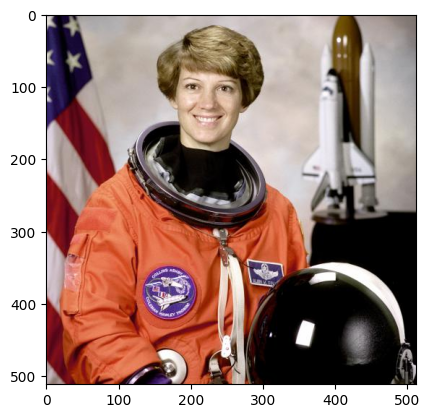

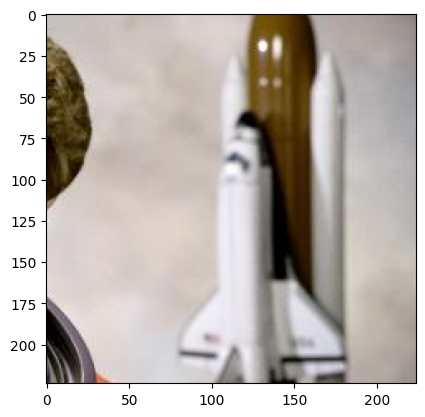

In [15]:
transform = v2.RandomCrop(size=(224, 224))
out = transform(img)
plt.imshow(img.permute(1,2,0))
plt.show()
plt.imshow(out.permute(1, 2, 0))

In [16]:
from torchvision import tv_tensors

In [17]:
boxes = tv_tensors.BoundingBoxes([
        [15, 10, 370, 510],
        [275, 340, 510, 510],
        [130, 345, 210, 425]
    ],
    format="XYXY", canvas_size=img.shape[-2:])

In [18]:
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomPhotometricDistort(p=1),
    v2.RandomHorizontalFlip(p=1),
])
out_img, out_boxes = transforms(img, boxes)
print(type(boxes), type(out_boxes))

<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>


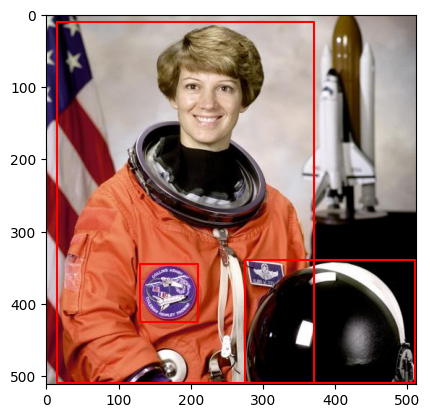

In [22]:
plt.imshow(img.permute(1, 2, 0))
for box in boxes:
    x_min, y_min, x_max, y_max = box.tolist()
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='red')
plt.show()

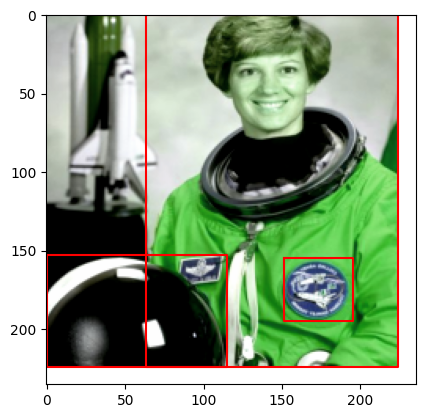

In [23]:
plt.imshow(out_img.permute(1, 2, 0))
for box in out_boxes:
    x_min, y_min, x_max, y_max = box.tolist()
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='red')
plt.show()